In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import LedoitWolf
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
%time datos = pd.read_csv('data_equilibrada.csv')
%time datos.tokens=datos.tokens.apply(literal_eval)

Wall time: 183 ms
Wall time: 1.89 s


In [ ]:
bow = pd.read_csv("bow.csv").token

In [ ]:
print("Matriz de covarianza habitual para:\n")
for nombre,grupo in datos.groupby("categorias"):
    if nombre in ['Admin','Mylife','Master Data Input','Payroll','Bswift']:
        tfidf=TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray()
        cov=np.cov(tfidf.T)
        print(f"Categoria: {nombre}")
        print("Numero de condicion:",np.linalg.cond(cov))
        print("Logaritmo del determinante:",np.linalg.slogdet(cov)[1])
        try:
            inv = np.linalg.inv(cov)
            print("Se puede invertir matriz")
        except:
            print("Matriz singular")
        print()

Matriz de covarianza habitual para:

Categoria: Admin
Numero de condicion: 2.1158660141089151e+37
Logaritmo del determinante: -inf
Matriz singular

Categoria: Bswift
Numero de condicion: inf
Logaritmo del determinante: -inf
Matriz singular

Categoria: Master Data Input
Numero de condicion: inf
Logaritmo del determinante: -inf
Matriz singular

Categoria: Mylife
Numero de condicion: 1.8410038418894955e+52
Logaritmo del determinante: -inf
Matriz singular

Categoria: Payroll
Numero de condicion: inf
Logaritmo del determinante: -inf
Matriz singular



In [ ]:
print("Matriz de covarianza Ledoit & Wolf para:\n")
for nombre,grupo in datos.groupby("categorias"):
    if nombre in ['Admin','Mylife','Master Data Input','Payroll','Bswift']:
        tfidf=TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray()
        cov_ledoit=LedoitWolf().fit(TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray()).covariance_
        print(f"Categoria: {nombre}")
        print("Numero de condicion:",np.linalg.cond(cov_ledoit))
        print("Logaritmo del determinante:",np.linalg.slogdet(cov_ledoit)[1])
        try:
            inv = np.linalg.inv(cov_ledoit)
            print("Se puede invertir matriz")
        except:
            print("Matriz singular")
        print()

In [ ]:
print("Distancias entre inversa e inversa generelizada de Ledoit&Wolf:\n")
for nombre,grupo in datos.groupby("categorias"):
    if nombre in ['Admin','Mylife','Master Data Input','Payroll','Bswift']:
        cov_ledoit=LedoitWolf().fit(TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray()).covariance_
        inv = np.linalg.inv(cov_ledoit)
        pinv = np.linalg.pinv(cov_ledoit)
        diferencia= inv-pinv
        print(f"Categoria: {nombre}")
        print(f"Norma 1: {np.linalg.norm(diferencia,1)}")
        print(f"Norma 2: {np.linalg.norm(diferencia,2)}")
        print(f"Norma infinito: {np.linalg.norm(diferencia,np.inf)}")
        print(f"Norma frobenius: {np.linalg.norm(diferencia,'fro')}")
        print()

Distancias entre inversa e inversa generelizada de Ledoit&Wolf:

Categoria: Admin
Norma 1: 2.4218779700280914e-06
Norma 2: 3.0654043637503504e-07
Norma infinito: 1.8415431606328991e-06
Norma frobenius: 4.936646374106224e-07

Categoria: Bswift
Norma 1: 1.1489217649801823e-09
Norma 2: 1.5326101456628449e-10
Norma infinito: 1.1904005204789793e-09
Norma frobenius: 5.101631911725667e-10

Categoria: Master Data Input
Norma 1: 1.3757526326485525e-08
Norma 2: 2.7346345651309647e-09
Norma infinito: 9.447169311767489e-09
Norma frobenius: 4.161514665135565e-09

Categoria: Mylife
Norma 1: 2.166211271449614e-06
Norma 2: 3.3765581521677493e-07
Norma infinito: 1.2756459129246466e-06
Norma frobenius: 4.5455420254833827e-07

Categoria: Payroll
Norma 1: 3.198078169126817e-08
Norma 2: 4.000424875998511e-09
Norma infinito: 1.1327574588411395e-08
Norma frobenius: 6.554965428614068e-09



In [ ]:
print("Distancias entre inversas generalizadas de cov habitual y Ledoit&Wolf:\n")
for nombre,grupo in datos.groupby("categorias"):
    if nombre in ['Admin','Mylife','Master Data Input','Payroll','Bswift']:
        tfidf=TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray()
        cov_habitual=np.cov(tfidf.T)
        cov_ledoit=LedoitWolf().fit(tfidf).covariance_
        pinv_habitual = np.linalg.pinv(cov_habitual)
        pinv_ledoit = np.linalg.pinv(cov_ledoit)
        diferencia= pinv_habitual-pinv_ledoit
        print(f"Categoria: {nombre}")
        print(f"Norma 1: {np.linalg.norm(diferencia,1)}")
        print(f"Norma 2: {np.linalg.norm(diferencia,2)}")
        print(f"Norma infinito: {np.linalg.norm(diferencia,np.inf)}")
        print(f"Norma frobenius: {np.linalg.norm(diferencia,'fro')}")
        print()

Distancias entre inversas generalizadas de cov habitual y Ledoit&Wolf:

Categoria: Admin
Norma 1: 161702661.2366163
Norma 2: 49982672.719930135
Norma infinito: 161702661.2289734
Norma frobenius: 74708763.2040483

Categoria: Bswift
Norma 1: 9041972.89594017
Norma 2: 2424751.6351293824
Norma infinito: 9041972.89594004
Norma frobenius: 2628093.1535979905

Categoria: Master Data Input
Norma 1: 20166060.81820154
Norma 2: 6623549.639991069
Norma infinito: 20166060.818200402
Norma frobenius: 8174208.320119106

Categoria: Mylife
Norma 1: 77491426.45157278
Norma 2: 25549713.27144525
Norma infinito: 77491426.45350707
Norma frobenius: 29041702.398722578

Categoria: Payroll
Norma 1: 12774396.781048585
Norma 2: 4912308.390371606
Norma infinito: 12774396.781049382
Norma frobenius: 7430385.50731966



In [ ]:
def obtener_outliers(distancias):
    Q1 = np.percentile(distancias, 25)
    Q3 = np.percentile(distancias, 75)
    IQR = Q3 - Q1
    upper = distancias >= (Q3+1.5*IQR)
    lower = distancias <= (Q1-1.5*IQR)
    return [list(distancias[upper].index),list(distancias[lower].index)]

Outliers(medias):

Categoria: Admin
Norma 1 - sup:54 inf:40
Norma 2 - sup:0 inf:1
Norma inf - sup:46 inf:0
Mahalanobis - sup:0 inf:0


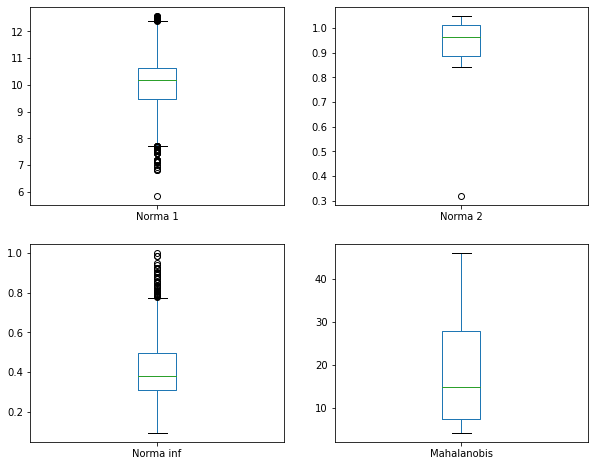


Categoria: Bswift
Norma 1 - sup:44 inf:18
Norma 2 - sup:0 inf:4
Norma inf - sup:25 inf:4
Mahalanobis - sup:11 inf:0


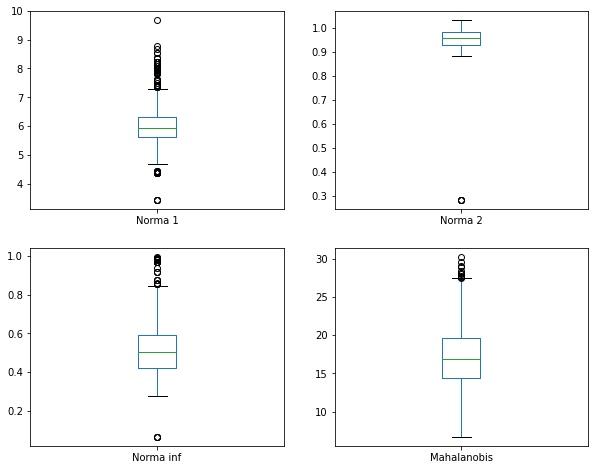


Categoria: Master Data Input
Norma 1 - sup:3 inf:0
Norma 2 - sup:0 inf:74
Norma inf - sup:27 inf:74
Mahalanobis - sup:15 inf:0


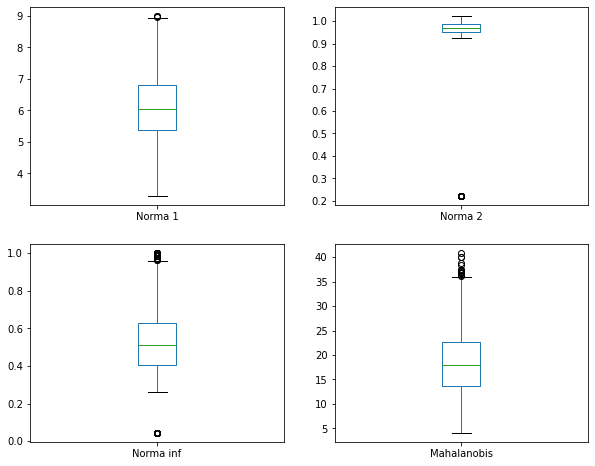


Categoria: Mylife
Norma 1 - sup:5 inf:0
Norma 2 - sup:0 inf:0
Norma inf - sup:30 inf:0
Mahalanobis - sup:0 inf:0


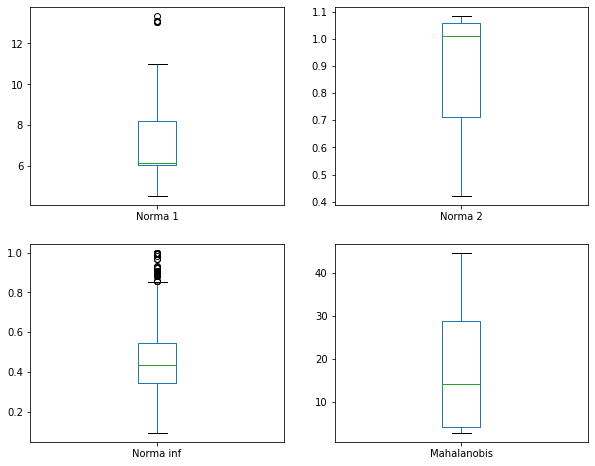


Categoria: Payroll
Norma 1 - sup:53 inf:2
Norma 2 - sup:0 inf:79
Norma inf - sup:13 inf:2
Mahalanobis - sup:32 inf:0


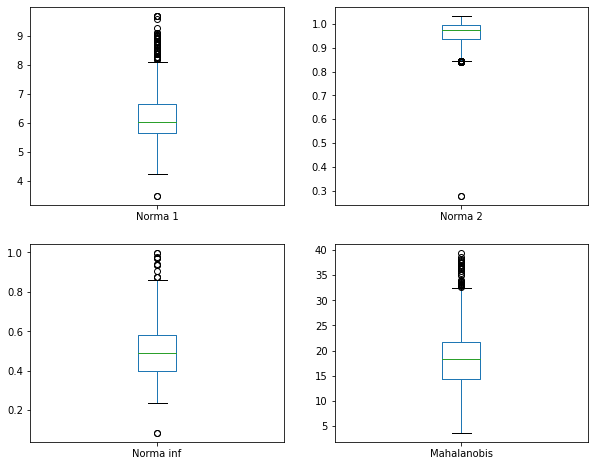

In [ ]:
print("Outliers(medias):\n")
lista_outliers_1=[]
lista_outliers_2=[]
lista_outliers_inf=[]
lista_outliers_mahal=[]
for nombre,grupo in datos.groupby("categorias"):
    if nombre in ['Admin','Mylife','Master Data Input','Payroll','Bswift']:
        print(f"Categoria: {nombre}")

        tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray(), columns=bow.values)
        medias=tfidf.mean()
        inv_cov=np.linalg.pinv(LedoitWolf().fit(tfidf).covariance_)
       
        distancias_mahal=tfidf.apply(lambda ticket: mahalanobis(medias,ticket,inv_cov),axis=1)
        distancias_inf=tfidf.apply(lambda ticket: np.linalg.norm(ticket-medias,np.inf),axis=1)
        distancias_1=tfidf.apply(lambda ticket: np.linalg.norm(ticket-medias,1),axis=1)
        distancias_2=tfidf.apply(lambda ticket: np.linalg.norm(ticket-medias,2),axis=1)
        
        outliers_mahal=obtener_outliers(distancias_mahal)
        outliers_inf=obtener_outliers(distancias_inf)
        outliers_1=obtener_outliers(distancias_1)
        outliers_2=obtener_outliers(distancias_2)
        
        lista_outliers_1.append(pd.Series(grupo.index).loc[[ item for elem in outliers_1 for item in elem]].values)
        lista_outliers_2.append(pd.Series(grupo.index).loc[[ item for elem in outliers_2 for item in elem]].values)
        lista_outliers_inf.append(pd.Series(grupo.index).loc[[ item for elem in outliers_inf for item in elem]].values)
        lista_outliers_mahal.append(pd.Series(grupo.index).loc[[ item for elem in outliers_mahal for item in elem]].values)
        
        print(f"Norma 1 - sup:{len(outliers_1[0])} inf:{len(outliers_1[1])}")
        print(f"Norma 2 - sup:{len(outliers_2[0])} inf:{len(outliers_2[1])}")
        print(f"Norma inf - sup:{len(outliers_inf[0])} inf:{len(outliers_inf[1])}")
        print(f"Mahalanobis - sup:{len(outliers_mahal[0])} inf:{len(outliers_mahal[1])}")
        
        fig,ax=plt.subplots(2,2,figsize=(10,8))
        distancias_1.name="Norma 1"
        distancias_2.name="Norma 2"
        distancias_inf.name="Norma inf"
        distancias_mahal.name="Mahalanobis"
        distancias_1.plot.box(ax=ax[0,0])
        distancias_2.plot.box(ax=ax[0,1])
        distancias_inf.plot.box(ax=ax[1,0])
        distancias_mahal.plot.box(ax=ax[1,1])
        plt.show()
        
        print()

In [ ]:
lista_outliers_1 = [item for elem in lista_outliers_1 for item in elem]
lista_outliers_2= [item for elem in lista_outliers_2 for item in elem]
lista_outliers_inf=[item for elem in lista_outliers_inf for item in elem]
lista_outliers_mahal=[item for elem in lista_outliers_mahal for item in elem]
print("Outliers identificados con cada distancia(medias):")
print(f"Mahalanobis: {len(lista_outliers_mahal)}")
print(f"Norma inf: {len(lista_outliers_inf)}")
print(f"Norma 2: {len(lista_outliers_2)}")
print(f"Norma 1: {len(lista_outliers_1)}")

Outliers identificados con cada distancia(medias):
Mahalanobis: 58
Norma inf: 221
Norma 2: 158
Norma 1: 219


In [ ]:
pd.DataFrame(lista_outliers_1,columns=['outliers']).to_csv('outliers_medias_1.csv',index=False)

Outliers(medianas):

Categoria: Admin
Norma 1 - sup:0 inf:1
Norma 2 - sup:172 inf:303
Norma inf - sup:93 inf:1
Mahalanobis - sup:0 inf:0


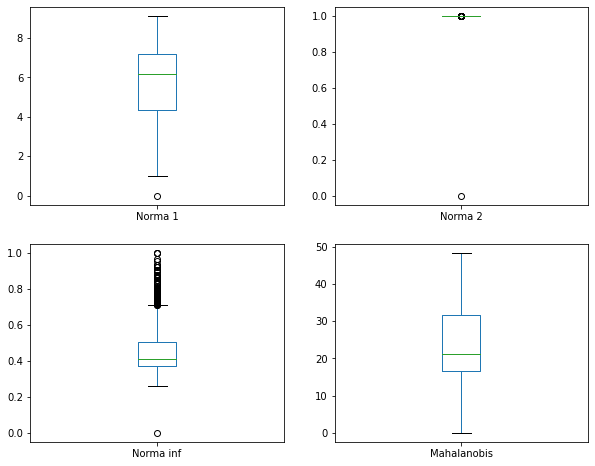


Categoria: Bswift
Norma 1 - sup:25 inf:18
Norma 2 - sup:0 inf:7
Norma inf - sup:28 inf:4
Mahalanobis - sup:13 inf:4


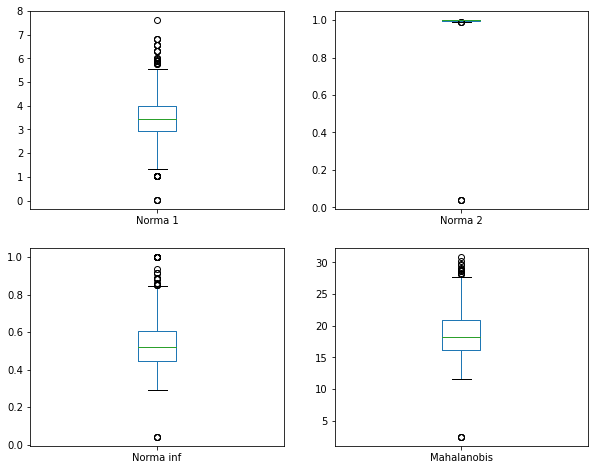


Categoria: Master Data Input
Norma 1 - sup:5 inf:0
Norma 2 - sup:101 inf:121
Norma inf - sup:30 inf:74
Mahalanobis - sup:16 inf:74


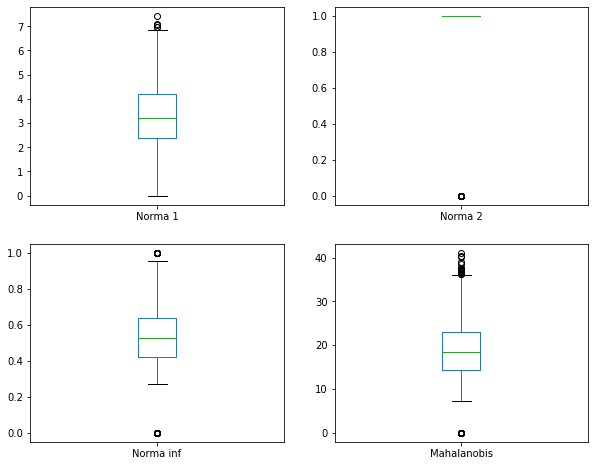


Categoria: Mylife
Norma 1 - sup:5 inf:15
Norma 2 - sup:0 inf:6
Norma inf - sup:44 inf:6
Mahalanobis - sup:0 inf:0


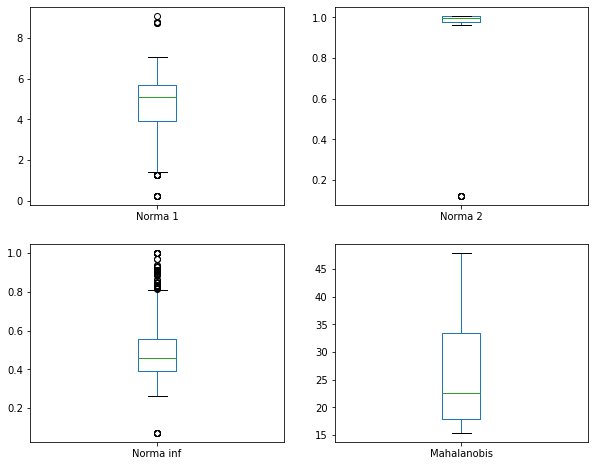


Categoria: Payroll
Norma 1 - sup:70 inf:23
Norma 2 - sup:78 inf:155
Norma inf - sup:21 inf:2
Mahalanobis - sup:33 inf:2


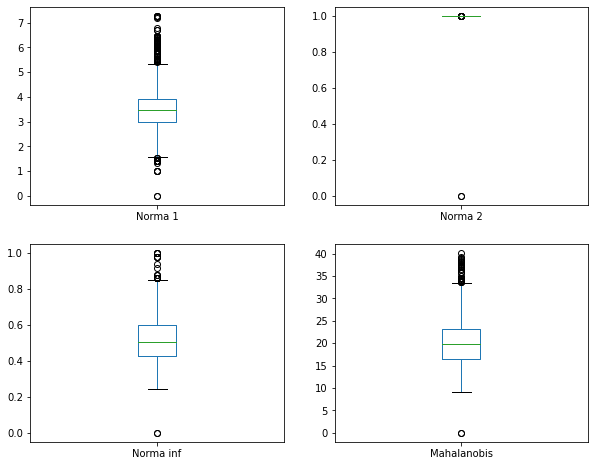

In [ ]:
print("Outliers(medianas):\n")
lista_outliers_1=[]
lista_outliers_2=[]
lista_outliers_inf=[]
lista_outliers_mahal=[]
for nombre,grupo in datos.groupby("categorias"):
    if nombre in ['Admin','Mylife','Master Data Input','Payroll','Bswift']:
        print(f"Categoria: {nombre}")

        tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.values).fit_transform(grupo['tokens'].str.join(" ")).toarray(), columns=bow.values)
        medianas=tfidf.median()
        inv_cov=np.linalg.pinv(LedoitWolf().fit(tfidf).covariance_)
       
        distancias_mahal=tfidf.apply(lambda ticket: mahalanobis(medianas,ticket,inv_cov),axis=1)
        distancias_inf=tfidf.apply(lambda ticket: np.linalg.norm(ticket-medianas,np.inf),axis=1)
        distancias_1=tfidf.apply(lambda ticket: np.linalg.norm(ticket-medianas,1),axis=1)
        distancias_2=tfidf.apply(lambda ticket: np.linalg.norm(ticket-medianas,2),axis=1)
        
        outliers_mahal=obtener_outliers(distancias_mahal)
        outliers_inf=obtener_outliers(distancias_inf)
        outliers_1=obtener_outliers(distancias_1)
        outliers_2=obtener_outliers(distancias_2)
        
        lista_outliers_1.append(pd.Series(grupo.index).loc[[ item for elem in outliers_1 for item in elem]].values)
        lista_outliers_2.append(pd.Series(grupo.index).loc[[ item for elem in outliers_2 for item in elem]].values)
        lista_outliers_inf.append(pd.Series(grupo.index).loc[[ item for elem in outliers_inf for item in elem]].values)
        lista_outliers_mahal.append(pd.Series(grupo.index).loc[[ item for elem in outliers_mahal for item in elem]].values)
        
        print(f"Norma 1 - sup:{len(outliers_1[0])} inf:{len(outliers_1[1])}")
        print(f"Norma 2 - sup:{len(outliers_2[0])} inf:{len(outliers_2[1])}")
        print(f"Norma inf - sup:{len(outliers_inf[0])} inf:{len(outliers_inf[1])}")
        print(f"Mahalanobis - sup:{len(outliers_mahal[0])} inf:{len(outliers_mahal[1])}")
        
        fig,ax=plt.subplots(2,2,figsize=(10,8))
        distancias_1.name="Norma 1"
        distancias_2.name="Norma 2"
        distancias_inf.name="Norma inf"
        distancias_mahal.name="Mahalanobis"
        distancias_1.plot.box(ax=ax[0,0])
        distancias_2.plot.box(ax=ax[0,1])
        distancias_inf.plot.box(ax=ax[1,0])
        distancias_mahal.plot.box(ax=ax[1,1])
        plt.show()
        
        print()

In [ ]:
lista_outliers_1 = [item for elem in lista_outliers_1 for item in elem]
lista_outliers_2= [item for elem in lista_outliers_2 for item in elem]
lista_outliers_inf=[item for elem in lista_outliers_inf for item in elem]
lista_outliers_mahal=[item for elem in lista_outliers_mahal for item in elem]
print("Outliers identificados con cada distancia(medianas):")
print(f"Mahalanobis: {len(lista_outliers_mahal)}")
print(f"Norma inf: {len(lista_outliers_inf)}")
print(f"Norma 2: {len(lista_outliers_2)}")
print(f"Norma 1: {len(lista_outliers_1)}")

Outliers identificados con cada distancia(medianas):
Mahalanobis: 142
Norma inf: 303
Norma 2: 943
Norma 1: 162


In [ ]:
pd.DataFrame(lista_outliers_2,columns=['outliers']).to_csv('outliers_medianas_2.csv',index=False)